In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cp = pd.read_csv(r"F:\carreer\car_price.csv")

In [3]:
cp.shape

(205, 26)

In [4]:
cp.isnull().sum()

symboling            0
normalized_losses    0
Fuel_type            0
make                 0
num_of_doors         0
aspiration           0
wheel_base           0
engine_location      0
drive_wheels         0
body_style           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [5]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
# here question marks are their in the data therefore it is consider as the null
cp = cp.replace({"?":np.nan})  # running replace function on entire data frame
        # so after this code the null which not showing before will so all the null values in the data
        # we already know how to handle the null

In [7]:
cp.isnull().sum()[cp.isnull().sum() > 0] # check the nulls only function

normalized_losses    41
num_of_doors          2
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [8]:
# cp.normalized_losses.mean() 
# not able find mean # ??err msg unssuported operand type eighter int or str
# so solution is after cp.info() their we get to know that type is of object type so we are not able to find mean
# here we to do is astype('float')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       203 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [9]:
# So converting it in float by using astype for all the nulls
cp.normalized_losses = cp.normalized_losses.astype('float')
cp.bore = cp.bore.astype('float')
cp.stroke = cp.stroke.astype('float')
cp.horsepower = cp.horsepower.astype('float')
cp.peak_rpm = cp.peak_rpm.astype('float')
cp.price = cp.price.astype('float')

# Important

In [10]:
# when target variable is having the null then remember you give zero
# beacause if will make assumption here then what is the use of model buiding so it will be kept zero(0)

In [1]:
# converting null using the fill na
cp.normalized_losses = cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore = cp.bore.fillna(cp.bore.mean())
cp.stroke = cp.stroke.fillna(cp.stroke.mean())
cp.horsepower = cp.horsepower.fillna(cp.horsepower.mean())
cp.peak_rpm = cp.peak_rpm.fillna(cp.peak_rpm.mean())
cp.price = cp.price.fillna(0) # when target variable is having the null then remember you give zero.
cp.num_of_doors = cp.num_of_doors.fillna('four')


NameError: name 'cp' is not defined

In [12]:
cp.head() 

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Home work

In [13]:
# rest of the code try on your own 
# rsquare , adjrsq , mase , mae , mape , check the assumptions
# remove the outlier rerun the model again

# NON NUM to NUM

In [14]:
# converting the non numeric to numeric
le = LabelEncoder()

In [15]:
# conveting numeric
cp[cp.select_dtypes(include=['object']).columns]= cp[cp.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [16]:
cp.head() # successfully converted the data from non numeric to numeric 

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [48]:
cp = df1 # after finding the outlier putting this line and rerunning the model again 

# Sampling data

In [49]:
cp_train , cp_test = train_test_split(cp , test_size = .2) # sampling the data for model building

In [50]:
cp_train.shape

(152, 26)

In [51]:
cp_test.shape

(39, 26)

In [52]:
cp_train_x = cp_train.iloc[: , 0:-1] # indepedent variable
cp_train_y = cp_train.iloc[: , -1] # target variable 

In [53]:
cp_test_x = cp_test.iloc[: , 0:-1]
cp_test_y = cp_test.iloc[: , -1]

# Creating linear model

In [54]:
# import linearregressoion which is already imported at top
linreg_cp = LinearRegression()

In [55]:
linreg_cp.fit(cp_train_x , cp_train_y) # model had been created

LinearRegression()

# Finding Rsquare

In [56]:
linreg_cp.score(cp_train_x,cp_train_y)

0.7907259126170134

In [57]:
Rsquare = linreg_cp.score(cp_train_x , cp_train_y)
Rsquare

0.7907259126170134

In [58]:
len(cp_train_x.columns)

25

# Finding the Adj Rsquare

In [59]:
N = cp_train_x.shape[0]
K = cp_train_x.shape[1]

In [60]:
AdjRsquare = 1 - (1 - Rsquare) * (N - 1)/( N - K - 1)
AdjRsquare

0.7492032762315002

In [61]:
linreg_cp.coef_ # to  find the coefficient # value of B1, B2 value slope M

array([ 1.42543138e+02,  9.17320393e+00,  1.83145578e+04,  5.85016669e+03,
       -1.92224475e+03, -4.28273421e+02,  2.49799336e+03,  8.13713541e-11,
       -1.67890417e+02, -1.65719688e+02,  9.61308924e+00,  6.78518000e+02,
        4.23757269e+02,  3.95214874e-01,  5.44908505e+01,  1.31149231e+03,
        1.09652329e+02,  7.08967172e+02, -1.06361423e+03, -1.80085799e+03,
        1.33181904e+03, -1.00732779e+02,  5.84327677e-01, -1.83892473e+02,
       -4.46805347e+01])

In [62]:
linreg_cp.intercept_ # to find the intercept  # Bo

-69347.19132022755

# Error

In [63]:
pred_train = linreg_cp.predict(cp_train_x)
pred_test = linreg_cp.predict(cp_test_x)

In [64]:
err_test = cp_test_y - pred_test # error=actual - predicted

In [65]:
err_train=cp_train_y - pred_train

In [66]:
np.mean(err_train) # (Mean Square Error) mean of error should always be close to zero

-1.2732925824820995e-11

# MSE

In [67]:
mse = np.mean(np.square(err_test))
mse

7288709.478595121

# Finding RMSE

In [68]:
rmse  = np.sqrt(mse) # it is nothing but the square root of  the rmse # root mean square error 
rmse

2699.761003977041

# MAPE

In [69]:
mape=np.mean(np.abs( err_test *100/cp_test_y))
mape # 100-11.31=00 88 % model accurary mean abs persentile error
#error*100/actual

18.845384568173092

# Predicting the data

In [70]:
pred_train_cp = linreg_cp.predict(cp_train_x)
pred_test_cp = linreg_cp.predict(cp_test_x)

# finding the error in the data 

In [71]:
err_train = cp_train_y - pred_train_cp
err_test = cp_test_y - pred_test_cp

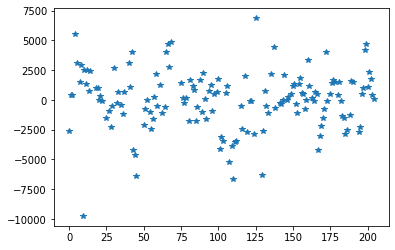

In [72]:
plt.plot(err_train , "*") # ploting the scatter plot 
                        # to check the pattern

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  4.,  5., 11., 10., 14., 28., 27.,
        23., 10.,  5.,  4.,  4.,  1.,  1.]),
 array([-9739.71561387, -8909.94832205, -8080.18103022, -7250.4137384 ,
        -6420.64644658, -5590.87915475, -4761.11186293, -3931.34457111,
        -3101.57727928, -2271.80998746, -1442.04269564,  -612.27540381,
          217.49188801,  1047.25917983,  1877.02647166,  2706.79376348,
         3536.5610553 ,  4366.32834713,  5196.09563895,  6025.86293078,
         6855.6302226 ]),
 <BarContainer object of 20 artists>)

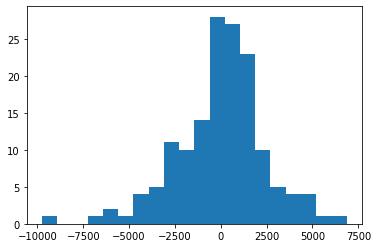

In [73]:
plt.hist(err_train, bins=20) # checking the histogram in the model 
                            # check if normally data or not

(array([ 1.,  0.,  0.,  1.,  2.,  1.,  4.,  5., 11., 10., 14., 28., 27.,
        23., 10.,  5.,  4.,  4.,  1.,  1.]),
 array([-9739.71561387, -8909.94832205, -8080.18103022, -7250.4137384 ,
        -6420.64644658, -5590.87915475, -4761.11186293, -3931.34457111,
        -3101.57727928, -2271.80998746, -1442.04269564,  -612.27540381,
          217.49188801,  1047.25917983,  1877.02647166,  2706.79376348,
         3536.5610553 ,  4366.32834713,  5196.09563895,  6025.86293078,
         6855.6302226 ]),
 <BarContainer object of 20 artists>)

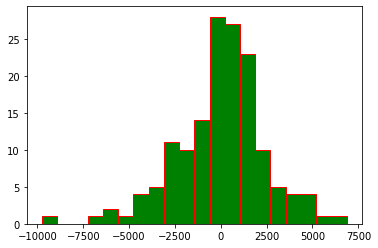

In [74]:
plt.hist(err_train , color = "g" , bins = 20 , edgecolor = "r") # check the if it is normally

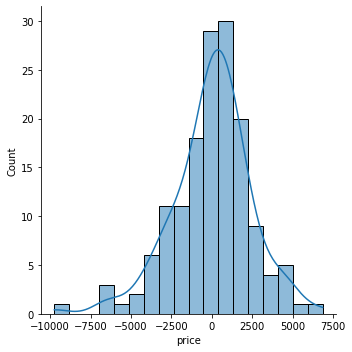

In [75]:
sns.displot(err_train,kde=True) # we peakness=3 lepotokutic

# Reggression (TO check the homocedenecity)

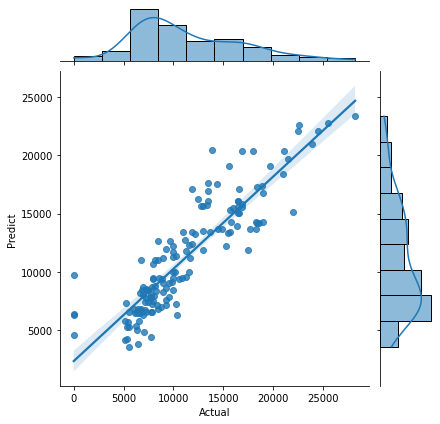

In [76]:
pred_actual_df = pd.DataFrame()
pred_actual_df['Actual'] = cp_train_y
pred_actual_df['Predict'] = pred_train_cp
sns.jointplot(x = 'Actual' , y = 'Predict',data = pred_actual_df, kind= 'reg')

# Removing the outlier

In [77]:
# code to remove the outlier
def remove_outlier(df,col,k=2):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    # df1 is A final dataframe (DF) where the outlier has been removed 
    print("Number of outlier removed ==>" , df.shape[0] - df1.shape[0])

In [78]:
remove_outlier(cp,'price', k=2)

(179, 26)
Number of outlier removed ==> 12


# Note -- here we have rerun the model after the removal of the outlier from the dataset just before the sampling